In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [3]:
with open('output.txt') as f:
    lines = f.readlines()

In [4]:
#def filters(data,signal_noise,asym_score,transit_prob):
    

In [6]:
lc_lists = [word for line in lines for word in line.split()]
lc_lists = [lc_lists[i:i+10] for i in range(0, len(lc_lists), 10)]

In [7]:
import pandas as pd

In [8]:
cols = ['fits_file','signal','signal/noise','time','asym_score','width1','width2','duration','depth','transit_prob']
df = pd.DataFrame(data=lc_lists,columns=cols)
df[cols[1:-1]] = df[cols[1:-1]].astype('float32')

In [9]:
df['transit_prob'].unique()

array(['maybeTransit', 'end', 'artefact', 'point'], dtype=object)

In [10]:
filtered_df = df[(df['signal/noise'] <= -5.0) & (df['asym_score'] >= 1.0) & (df['transit_prob'] == 'maybeTransit')]

In [11]:
filtered_df.head()

,fits_file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
136,hlsp_tess-spoc_tess_phot_0000000052752703-s000...,-5.594328,-5.198797,1469.805786,1.025391,0.125228,7.237590e-03,0.270837,-0.000540,maybeTransit
480,hlsp_tess-spoc_tess_phot_0000000037793925-s000...,-6.812760,-5.541304,1476.889648,1.076527,0.096393,2.109154e-02,0.125000,-0.002125,maybeTransit
548,hlsp_tess-spoc_tess_phot_0000000011401568-s000...,-8.976393,-5.892786,1476.536865,1.000789,0.198790,4.978564e-02,0.520825,-0.000476,maybeTransit
551,hlsp_tess-spoc_tess_phot_0000000011407252-s000...,-10.342960,-7.227973,1474.099243,1.146985,0.067226,2.270660e-03,0.145831,-0.005590,maybeTransit
573,hlsp_tess-spoc_tess_phot_0000000011403522-s000...,-5.720953,-5.207456,1481.203491,1.004609,0.353149,1.000000e-08,0.395827,-0.001257,maybeTransit


In [12]:
filtered_df['fits_file']

136       hlsp_tess-spoc_tess_phot_0000000052752703-s000...
480       hlsp_tess-spoc_tess_phot_0000000037793925-s000...
548       hlsp_tess-spoc_tess_phot_0000000011401568-s000...
551       hlsp_tess-spoc_tess_phot_0000000011407252-s000...
573       hlsp_tess-spoc_tess_phot_0000000011403522-s000...
                                ...                        
159863    hlsp_tess-spoc_tess_phot_0000000260370094-s000...
159906    hlsp_tess-spoc_tess_phot_0000000247746326-s000...
159908    hlsp_tess-spoc_tess_phot_0000000247740884-s000...
159917    hlsp_tess-spoc_tess_phot_0000000247741354-s000...
159976    hlsp_tess-spoc_tess_phot_0000000269274282-s000...
Name: fits_file, Length: 2565, dtype: object

In [13]:
len(filtered_df['fits_file'])

2565

In [14]:
filtered_df['fits_file'].iloc[0]

'hlsp_tess-spoc_tess_phot_0000000052752703-s0006_tess_v1_lc.fits'

---

In [15]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'signal/noise')

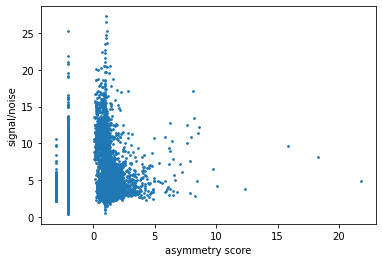

In [18]:
plt.scatter(df['asym_score'],abs(df['signal/noise']),s=3)
plt.xlabel('asymmetry score')
plt.ylabel('signal/noise')
